In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as DataSets
import sklearn.model_selection as cv
import matplotlib.pyplot as plt


In [2]:
def GradientDescent(x,y,alpha = 0.0000008 , tolerance = 0.0000001 , max_itr = 1000000):
    n,f = x.shape
    
    # x[0] = 1
    x = np.c_[np.ones(n),x]  # x -> (n,f+1)
    theta = np.zeros((f+1,1)) # theta -> (f+1,1)
    
    #print(theta)
    #print(x[:5,:])
    cost = []
    itr = []
    
    cnt = 0
    error = (((np.matmul(x,theta) - y)*(np.matmul(x,theta) - y)).sum())/(2*n)
    while(error>=tolerance and cnt<=max_itr):
        tmp = np.matmul(x.T,(np.matmul(x,theta)-y))/n
        theta = theta - alpha*tmp
        cnt += 1
        
        new_error = (((np.matmul(x,theta)-y)**2).sum())/(2*n)
        itr.append(cnt)
        cost.append(new_error)
        error = abs(error - new_error)
        
    print(" Iterations = ",cnt)
    plt.plot(itr,cost,color='red')
    plt.show()
        
    return theta

In [3]:
test_data = pd.read_excel(r"../data/L3_homework/test.xlsx")
train_data = pd.read_excel(r"../data/L3_homework/train.xlsx")
X_train = train_data.iloc[:,:-1].values
Y_train = train_data.iloc[:,-1].values
X_test = test_data.iloc[:,:-1].values
Y_test = test_data.iloc[:,-1].values

 Iterations =  4084


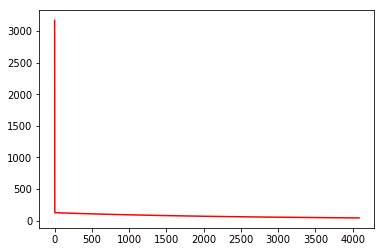

In [4]:
#print(Y_train[:5])
#print(Y_train.reshape(len(Y_train),1)[:5,:])

theta  = GradientDescent(X_train,Y_train.reshape(len(Y_train),1))

In [5]:
def predict(x,theta):
    x = np.c_[np.ones(x.shape[0]),x]
    return np.matmul(x,theta)

def acc(yT,yP):
    num = ((yT-yP)*(yT-yP)).sum()
    den = ((yT-yT.mean())*(yT-yT.mean())).sum()
    score = 1 - num/den
    return score

yP = predict(X_test,theta)
# print (yP.reshape(len(yP)) )
print( "Unscaled Gradient Descent Score = " , acc(Y_test,yP.reshape(len(yP))))

Unscaled Gradient Descent Score =  0.695056630085
